
**Python (Semester 2 2024)**
# 5 Writing Efficient Code in Python

*N. Hernitschek*

This notebook contains advanced examples of plotting with Matplotlib for **Python (Semester 2 2024)**. 




---
## Contents
* [Monitoring code execution time](#first-bullet)
* [Avoiding slow program/ data structures](#second-bullet)
* [Storing and reusing data structures - serializing with `pickle`](#third-bullet)
* [Storing and reusing function calls - memoization](#fourth-bullet)
* [Summary](#sixth-bullet)




Python has the benefits of being a very portable, high-level programming language with many libraries available for especially data science, machine learning, physics and astronomy.

A drawback of Python is that the code execution can be a bit slow in comparison to programming languages such as C/C++.

We address this in three ways:
* monitoring code execution time
* avoiding slow program/ data structures
* (later: parallelization)
* (later: using C++ inline code)






## 1. Monitoring code execution time<a class="anchor" id="first-bullet"></a>


Slow execution time often is a result of using less than optimal data structures, as well as common mistakes like reading in the same file over and over again. We will address reasons for slow code execution time in detail, but first let's take a look at how to identify slow parts in your code.


There are many Python modules like `time`, `timeit`, and `datetime` in Python which can store the time at which the particular section of the program is being executed. In this way, we can calculate the time it took to execute that section. 

 

The following methods can be used to compute time differences:

* `time` module provides various time-related funtions. The module is included in Python’s standard utility modules. `time.time()` method of Time module is used to get the time in seconds since epoch. The handling of leap seconds is platform-dependent.
* `datetime` library defines a function that can be primarily used to get the current time and date. The `now()` function returns the current local date and time, which is defined under `datetime` module.
* `timeit` runs your code millions of times (default value is 1000000) so that you get the statistically most relevant measurement of code execution time.




### Using `datetime` module and `datetime.now` function

This method is useful if we want to write a log file.

In [2]:
# program to compute the time of
# execution of any python code
from datetime import datetime
 
# we initialize the variable start to
# store the starting time of execution
# of program
start = datetime.now()
print('start: ', start)
 
# we can take any program but for
# example we have taken the below
# program
a = 0
for i in range(1000):
    a += (i**100)
 
# now we have initialized the variable
# end to store the ending time after
# execution of program
end = datetime.now()

print('end: ', end)

# difference of start and end variables
# gives the time of execution of the
# program in between
print("The time of execution of above program is: ",
      str(end-start)[5:])

start:  2024-08-07 19:59:45.033825
end:  2024-08-07 19:59:45.040090
The time of execution of above program is:  00.006265


### Using `timeit`

This module provides a simple way to find the execution time of small sections of Python code. The module function `timeit.timeit(stmt, setup, timer, number)` accepts four arguments:

`stmt`: the statement you want to measure; it defaults to `pass`.
    
`setup`: the code that you run before running the stmt; it defaults to `pass`. We generally use this to import the required modules for our code.
    
`timer`: a `timeit.Timer` object; it usually has a sensible default value so you don’t have to worry about it.
    
`number`: the number of executions you’d like to run the `stmt`.

In [4]:
# program to compute the time of
# execution of any python code using timit
 
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = "from math import sqrt"
 
# code snippet whose execution time
# is to be measured
mycode = '''
def example():
    mylist = []
    for x in range(100):
        mylist.append(sqrt(x))
'''
 
# timeit statement
print ("The time of execution of above program is :",
       timeit.timeit(setup = mysetup,
                    stmt = mycode,
                    number = 100))

The time of execution of above program is : 1.9186001736670732e-05


### Using a source code profiler

    
The most 'technical' and advanced method on how to monitor code execution time is using a source-code profiler.    
    
`cProfile` and `profile` provide deterministic profiling of Python programs. A profile is a set of statistics that describes how often and for how long various parts of the program executed. These statistics can be formatted into reports via the pstats module.

The Python standard library provides two different implementations of the same profiling interface:

* `cProfile` is recommended for most users; it’s a C extension with reasonable overhead that makes it suitable for profiling long-running programs. Based on lsprof, contributed by Brett Rosen and Ted Czotter.

* `profile`, a pure Python module whose interface is imitated by `cProfile`, but which adds significant overhead to profiled programs. If you’re trying to extend the profiler in some way, the task might be easier with this module. Originally designed and written by Jim Roskind.

    
**Important note on the usage of `profile` and `cProfile`** 

The profiler modules are designed to provide an execution profile for a given program, not for the purpose of creating (accurate) benchmarkings. For the latter, `timeit` is a better choice giving reasonably accurate results. 
This particularly applies to benchmarking Python code against C code: the profilers introduce overhead for Python code, but not for C-level functions, and so the C code would seem faster than any Python one.
A profiler, however, can be used to generally spot which parts of your code take a relatively long time to execute, how often certain calls are made and whether this makes sense. This is the exact usage of a profiler.
    

More on this can be found in the documentation: https://docs.python.org/3/library/profile.html    

In [5]:
import re
import cProfile

def foo():

    character="b"
    reps="2"
    s = "aaaaaaaaaaaaaaaabbcddd"
    patternString = rf"([^{character}])(?=\1{{0,{reps}}}{character})"
    pattern = re.compile(patternString)
    print (re.findall(pattern, s))

cProfile.run('foo()')

['a', 'a', 'a']
         273 function calls (260 primitive calls) in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 3005196447.py:4(foo)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 enum.py:359(__call__)
        2    0.000    0.000    0.000    0.000 enum.py:678(__new__)
        1    0.000    0.000    0.000    0.000 enum.py:986(__and__)
        1    0.000    0.000    0.000    0.000 iostream.py:203(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:444(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:465(_schedule_flush)
        2    0.000    0.000    0.001    0.000 iostream.py:535(write)
        1    0.000    0.000    0.000    0.000 iostream.py:90(_event_pipe)
        1    0.000    0.000    0.000    0.000 re.py:232(findall)
        1    0.000    0.000    0.001 

An example where it becomes more clear what you can spot by using a profiler:

In [6]:
import pandas as pd
import cProfile

def get_star_type(lc_id):

    table = pd.read_csv('test_featuretable.csv', names = ['lc','type'],usecols = [0,1], skiprows=1) 
    
    star_type = table.loc[table['lc'] == lc_id, 'type'].iloc[0]
    
    return star_type
    
def main():
    
    stars = ['41259805_sector01_4_2.lc', '306893839_sector01_4_3.lc', '308452159_sector01_4_3.lc', \
             '309148260_sector01_4_3.lc', '327597288_sector01_2_1.lc', '348898673_sector01_4_3.lc', \
             '349409844_sector01_4_3.lc', '350146577_sector01_4_3.lc', '355650641_sector01_2_2.lc', \
             '358467700_sector01_4_3.lc', '364424408_sector01_4_2.lc', '369220372_sector01_1_1.lc', \
             '382512330_sector01_4_3.lc', '392761412_sector01_3_2.lc', '404807716_sector01_4_2.lc', \
             '410451777_sector01_4_3.lc', '441155956_sector01_1_3.lc', '140687857_sector01_4_2.lc', \
             '142109122_sector01_4_2.lc', '150106606_sector01_4_4.lc', '150270037_sector01_4_3.lc', \
             '167167404_sector01_4_3.lc', '267428681_sector01_3_2.lc', '269792822_sector01_3_3.lc', \
             '271642238_sector01_4_2.lc', '276861305_sector01_4_1.lc', '277316247_sector01_4_1.lc', \
             '278863994_sector01_4_4.lc', '293347406_sector01_4_3.lc', '306470448_sector01_4_3.lc', \
             '306577678_sector01_4_3.lc', '306580505_sector01_4_3.lc', '309701876_sector01_4_1.lc', \
             '349413748_sector01_4_3.lc', '350434368_sector01_4_4.lc', '350518415_sector01_4_4.lc', \
             '364588437_sector01_4_2.lc', '373767115_sector01_4_2.lc']  
       
    for star in stars:
        print(star, get_star_type(star))

cProfile.run('main()')

41259805_sector01_4_2.lc ACV
306893839_sector01_4_3.lc ACV
308452159_sector01_4_3.lc ACV
309148260_sector01_4_3.lc ACV
327597288_sector01_2_1.lc ACV
348898673_sector01_4_3.lc ACV
349409844_sector01_4_3.lc ACV
350146577_sector01_4_3.lc ACV
355650641_sector01_2_2.lc ACV
358467700_sector01_4_3.lc ACV
364424408_sector01_4_2.lc ACV
369220372_sector01_1_1.lc ACV
382512330_sector01_4_3.lc ACV
392761412_sector01_3_2.lc ACV
404807716_sector01_4_2.lc ACV
410451777_sector01_4_3.lc ACV
441155956_sector01_1_3.lc ACV
140687857_sector01_4_2.lc CEP
142109122_sector01_4_2.lc CEP
150106606_sector01_4_4.lc CEP
150270037_sector01_4_3.lc CEP
167167404_sector01_4_3.lc CEP
267428681_sector01_3_2.lc CEP
269792822_sector01_3_3.lc CEP
271642238_sector01_4_2.lc CEP
276861305_sector01_4_1.lc CEP
277316247_sector01_4_1.lc CEP
278863994_sector01_4_4.lc CEP
293347406_sector01_4_3.lc CEP
306470448_sector01_4_3.lc CEP
306577678_sector01_4_3.lc CEP
306580505_sector01_4_3.lc CEP
309701876_sector01_4_1.lc CEP
349413748_s

**Question:**
Do you see what's happening?    

## 2. Avoiding slow program/ data structures<a class="anchor" id="first-bullet"></a>

Certain program structures, as well as data structures, tend to be slow in Python. It is good to know about this and whenever possible, replace these program and data structures by faster ones.


**Example:** Reducing execution time by using list comprehensions
    
Forming a list of all even numbers up to $10^5$ can be done in the following ways:

In [7]:
%%timeit -n 100
  
even =[ ]
for i in range(10**6):
    if i % 2 == 0:
        even.append(i)

171 ms ± 29.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit -n 100
  
even =[i for i in range(10**6) if i % 2 == 0]

96.5 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


This time difference matters a lot when these type of lists are part of a very large program.

In [ ]:
import time 
  
  
# Using for loop
start = time.time()
a =[ ]
  
for i in range(10**7):
    if i % 2 == 0:
        a.append(i)
          
print("Execution time = ", time.time()-start)
  
# Using list comprehension
start = time.time()
   
a =[i for i in range(10**7) if i % 2 == 0]
print("Execution time = ", time.time()-start)

Another example:

Loop:	77.1 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


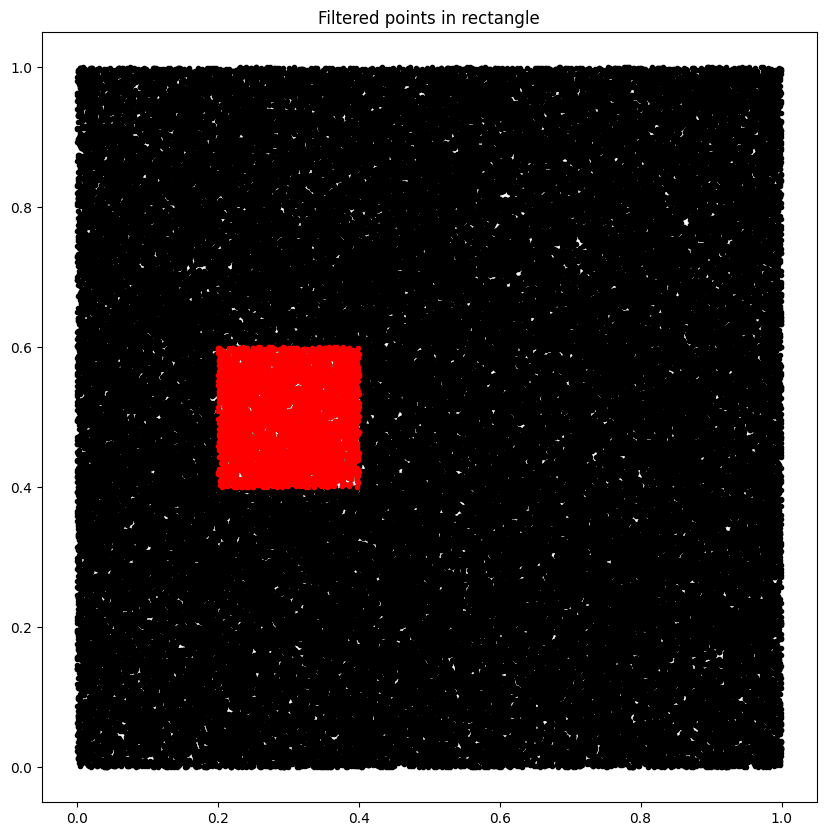

In [11]:
## source: https://gist.github.com/straussmaximilian

import numpy as np


def random_array(size, dim=3):
    """
    Generate a random array of size size and dimension dim
    """
    return np.random.rand(int(size), dim)


def loop(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4]
    for the first column and between [0.4,0.6] for the second column by
    looping through every point.
    """
    filtered_list = []
    for i in range(len(array)):
        # Check if the point is within the rectangle
        if ((array[i][0] >= 0.2)
            and (array[i][1] >= 0.4)
            and (array[i][0] <= 0.4)
            and (array[i][1] <= 0.6)):
            filtered_list.append(array[i])
    return np.array(filtered_list)


# Generate a random array of size 1e5
array = random_array(1e5)
filtered_array = loop(array)

# Measure code execution with inline magic (Jupyter Notebook)
print('Loop:\t', end='')
%timeit loop(array)

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Filtered points in rectangle')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(filtered_array[:, 0], filtered_array[:, 1], 'r.')
plt.show()

In [12]:
# source: https://gist.github.com/straussmaximilian

def python_loop(random_list):
    """
    Takes a list of tuples and isolates all points that are within [0.2,0.4]
    for the first dimension and between [0.4,0.6] for the second dimension.
    """
    filtered_list = []
    for i in range(len(random_list)):
        if ((random_list[i][0] >= 0.2)
            and (random_list[i][1] >= 0.4)
            and (random_list[i][0] <= 0.4)
            and (random_list[i][1] <= 0.6)):
            filtered_list.append(random_list[i])
    return filtered_list

# Convert the numpy array to a list of tuples
python_list = list(map(tuple, array))

print('Python loop:\t', end='')
%timeit python_loop(python_list)

Python loop:	21.2 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3. Storing and reusing data structures - serializing with `pickle` <a class="anchor" id="third-bullet"></a>

**Serializing** a Python object structure is the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

**Question:** Which applications do you see for this?

Imagine we carry out some rather time-expensive calculation at the beginning of our program. This needs to be carried out each time we start our code, e.g. we have to read in a table, calculate some values based on table columns...
In this case it can be useful to simply save that data into a `*.txt` (`*.dat`, `*.csv`) file. This works great for data in a simple table format that we maybe also want to inspect manually.

With more complicated **data structures**, such as e.g. trained classifiers, this becomes infeasible, and **serializing** is the right option.
Also, even for *.txt files, reading in a serialized file can save a lot of time.

The `pickle` module implements binary protocols for serializing and de-serializing a Python object structure. 

In the following, we will use the `pickle` module to serialize a Python object.


More on this:

https://docs.python.org/3/library/pickle.html

In [13]:
# Save a dictionary into a pickle file. For illustration purposes, a simple object was chosen.
import pickle

galaxies = {"Andromeda Galaxy": "NGC 224", "Messier 32": "NGC 221", "Sculptor Galaxy": "NGC 253",
            "Small Magellanic Cloud": "NGC 292"}

pickle.dump(galaxies, open( "galaxies.pickle", "wb" ) )

In [14]:
# Load the dictionary back from the pickle file.
import pickle
 
galaxies = pickle.load( open( "galaxies.pickle", "rb" ) )

print(galaxies)

{'Andromeda Galaxy': 'NGC 224', 'Messier 32': 'NGC 221', 'Sculptor Galaxy': 'NGC 253', 'Small Magellanic Cloud': 'NGC 292'}


*Some comments on using `pickle`:*

* *Be cautious with pickle files from unknown/ not trustworthy sources.*
Pickle files can contain code. This includes potential malicious code that would run once to de-pickle it.
Only use pickle files you created on your own


* *What can be pickled?*
A general rule: you can pickle any object for which you can pickle every attribute. 
A complete list can be found here: https://docs.python.org/3/library/pickle.html#what-can-be-pickled-and-unpickled


* *Don't use pickle to store results.*
Serialized data can cause problems if you save a pickle, then update your code and read the pickle in. Attribute added to your __init__ may not be present in the unpickled object; also, if pickle can't find your class and module (e.g., if you renamed the module) you will get errors.
For this reason, you should be wary of using pickles for long-term storage where the underlying code is not highly stable. It should only be used to speed up code by reading in data structures faster, which however should always be reproducible. I.e.: Your program starts with reading in an initial file, do some calculations on it before the "real" purpose of your program (e.g.: in the beginning, you read in a file containing a list of astronomical objects and you retrieve their coordinates). You can pickle it, and if for any reason the pickle is lost, you can always recreate it. The same is true with a trained classifier: You train a classifier, and before applying it (to a very large data set), you pickle it. You can always re-train your classifier if necessary.

## 4. Storing and reusing function calls - memoization <a class="anchor" id="fourth-bullet"></a>

We have seen **caching** in the lecture. A similar, but somewhat differently implemented technique is called **memoization**.

In computing, **memoization** or memoisation is an optimization technique used primarily to speed up computer programs by **storing the results of expensive function calls** and returning the cached result when the same inputs occur again. Although this is related to caching, memoization refers to a specific case of this optimization, distinguishing it from forms of caching such as buffering.

One example: We might use memoization to cache the results of a function like that:




In [15]:

def _download_and_preprocess_neighbors(
    corrected_lc: LightCurve,
    radius: float = 6000.0,
    min_targets: int = 30,
    max_targets: int = 50,
    interpolate: bool = False,
    author: tuple = ("Kepler", "K2", "SPOC"),
    flux_column: str = "sap_flux",
):


SyntaxError: incomplete input (2540232072.py, line 9)

The above is the function definition of a function that downloads and processes sources which are within a given radius around a source provided as input.

When this function is called with input parameters it was called with before, the memoized result from the previous call (with the same parameters) should be reused.

**Example:** computing factorials using memoization in Python

To memoize a function in Python, we can use a utility supplied in Python’s standard library: the `functools.lru_cache` decorator.
We compute the Fibonacci sequence* and check the execution time:


*The Fibonacci sequence is defined as the sequence of the Fibonacci numbers, wich can be defined by the
recurrence relation
$F_{0}=0, \, F_{1}=1,$
$F_{n}=F_{n-1}+F_{n-2}$
for $n > 1$.
This gives
$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...$



In [17]:
# we first install it
!pip3 install memoization

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=4ec11bc8a20b2fe5e13d6b03de5811c15b10021ffc9f858318b482699d1c4806
  Stored in directory: /home/nhernits/.cache/pip/wheels/3e/b8/c5/b553d5e8b0249bd2859b3b6d7bb2a1849e7b01c6e8b64f6e87
Successfully built memoization


In [19]:
import memoization
from memoization import cached
import time
  
# Function that computes Fibonacci 
# numbers without memoization
def fib_without_cache(n):
    if n < 2:
        return n
    return fib_without_cache(n-1) + fib_without_cache(n-2)
      
# Execution start time
begin = time.time()
fib_without_cache(30)
  
# Execution end time
end = time.time()
  
print("Time taken to execute the function without memoization is", end-begin)
  
# Function that computes Fibonacci
# numbers with memoization
@cached
def fib_with_cache(n):
    if n < 2:
        return n
    return fib_with_cache(n-1) + fib_with_cache(n-2)
      
begin = time.time()
fib_with_cache(30)
end = time.time()
  
print("Time taken to execute the function with memoization is", end-begin)


Time taken to execute the function without memoization is 0.3547544479370117
Time taken to execute the function with memoization is 0.0003573894500732422


By default, memoization tries to combine all your function arguments and calculate its hash value using `hash()`. If it turns out that parts of your arguments are unhashable, memoization will fall back to turning them into a string using `str()`. This behavior relies on the assumption that the string exactly represents the internal state of the arguments, which is true for built-in types.

However, this is not true for all objects. If you pass objects which are instances of non-built-in classes, sometimes you will need to override the default key-making procedure, because the `str()` function on these objects may not hold the correct information about their states.


More on this can be found in the documentation:
https://pypi.org/project/memoization/

## Summary <a class="anchor" id="sixth-bullet"></a>

In this lession, we have seen how to measure the efficiency of our code, and how to improve it.
Doing so is especially important when we process a high amount of data